ValueError: Freq was not given and was not set in the index

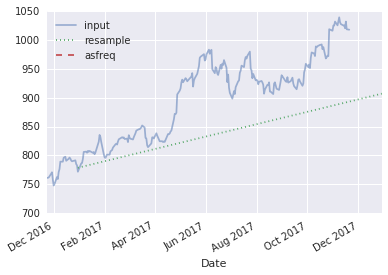

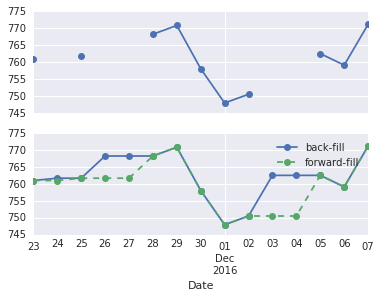

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
from pandas_datareader import data
%matplotlib inline

goog = data.DataReader('GOOG', start='2004', end='2017', data_source='google')
tsla = data.DataReader('TSLA', start='2009', end='2017', data_source='google')
amzn = data.DataReader('AMZN', start='2004', end='2017', data_source='google')

goog_closed_price = goog['Close']
tsla_closed_price = tsla['Close']
amzn_closed_price = amzn['Close']

goog_closed_price.plot(alpha=0.5, style='-')
goog_closed_price.resample('BA').mean().plot(style=':')
goog_closed_price.asfreq('BA').plot(style='--')
plt.legend(['input', 'resample', 'asfreq'], loc='upper left')

fig, ax  = plt.subplots(2, sharex=True)
data = goog_closed_price.iloc[:10]
data.asfreq('D').plot(ax=ax[0], marker='o')
data.asfreq('D', method='bfill').plot(ax=ax[1], style='-o')
data.asfreq('D', method='ffill').plot(ax=ax[1], style='--o')

ax[1].legend(['back-fill', 'forward-fill'])


# goog = goog_closed_price.asfreq('D', method='pad')
# goog.plot(ax=ax[0])
# goog.shift(900).plot(ax=ax[1])
# goog.tshift(900).plot(ax=ax[2])

# local_max = pd.to_datetime('2007-11-05')
# offset = pd.Timedelta(900, 'D')

# ax[0].legend(['input'], loc=2)
# ax[0].get_xticklabels()[4].set(weight='heavy', color='red')
# ax[0].axvline(local_max + offset, alpha=0.3, color='red')

# ax[1].legend(['shift(900)'], loc=2)
# ax[1].get_xticklabels()[4].set(weight='heavy', color='red')
# ax[1].axvline(local_max + offset, alpha=0.3, color='red')

ROI = 100 * (goog.tshift(-365) / goog - 1)
ROI.plot()
plt.ylabel("% Return of Investment")